In [9]:
from mongoengine import connect, disconnect_all
from utils import mongo_to_df
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
import sklearn.model_selection as ms
import numpy as np
import random
from sklearn.metrics import plot_roc_curve, classification_report, log_loss
import matplotlib.pyplot as plt

np.random.seed(21)
random.seed(21)

### Preparando dados

In [10]:
connect("tcc")
df = mongo_to_df()
disconnect_all()

In [11]:
df.head()

,_id,answer_1,answer_2,answer_3,answer_4,answer_5,answer_6,answer_7,answer_8,answer_9,answer_10,answer_11,evaded,user_id
0,FAKE_answer-17e4e593581240e29ab1e5c3427f945e,True,False,False,False,False,True,False,True,True,True,True,False,FAKE_user-c0065f16f964447f854fec27f697ff50
1,FAKE_answer-02bee963584e45c6836d0aab2d3b5482,True,False,False,False,True,False,False,True,False,True,True,True,FAKE_user-b030f4a84c0e4223beb701aaf79dbf51
2,FAKE_answer-a21c2c0c30ba487388c63e0645130120,True,False,False,False,True,True,True,False,True,True,True,True,FAKE_user-7d4fc1783f8f4964aeb1d8f6db3ba3a9
3,FAKE_answer-9010730262ad45babdf01293a03dbeed,False,True,False,True,False,False,False,False,False,False,False,False,FAKE_user-8190078bf6204bdaa58099048df24eb9
4,FAKE_answer-268c9cc5a4564d8f9252d37b5a056174,True,False,True,False,True,True,False,True,True,True,False,False,FAKE_user-955bbf2a71f64941b9d62fa47cc9b47a


In [12]:
df = df.drop(columns=["_id", "user_id"])

In [13]:
# df = df.astype(int)

In [14]:
df.head()

,answer_1,answer_2,answer_3,answer_4,answer_5,answer_6,answer_7,answer_8,answer_9,answer_10,answer_11,evaded
0,True,False,False,False,False,True,False,True,True,True,True,False
1,True,False,False,False,True,False,False,True,False,True,True,True
2,True,False,False,False,True,True,True,False,True,True,True,True
3,False,True,False,True,False,False,False,False,False,False,False,False
4,True,False,True,False,True,True,False,True,True,True,False,False


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   answer_1   100 non-null    bool 
 1   answer_2   100 non-null    bool 
 2   answer_3   100 non-null    bool 
 3   answer_4   100 non-null    bool 
 4   answer_5   100 non-null    bool 
 5   answer_6   100 non-null    bool 
 6   answer_7   100 non-null    bool 
 7   answer_8   100 non-null    bool 
 8   answer_9   100 non-null    bool 
 9   answer_10  100 non-null    bool 
 10  answer_11  100 non-null    bool 
 11  evaded     100 non-null    bool 
dtypes: bool(12)
memory usage: 1.3 KB


In [16]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

### Separação dos dados

In [17]:
# X_train, X_test, y_train, y_test = ms.train_test_split(X, y, test_size=0.2, random_state=0)
X_train, X_test, y_train, y_test = ms.train_test_split(X, y, test_size=0.2, shuffle=True, random_state=0)

In [18]:
len(X_train)

80

# Métricas de avaliação

## Matriz de confusão

* Positivo Verdadeiro (True Positive – TP) que significa que a classe prevista e observada originalmente fazem parte da classe positiva;

* Falso Positivo (False Positive – FP) que significa que a classe predita retornou positivo mas a original observada era negativa;

* Negativo Verdadeiro (True Negative – TN) os valores preditos e observados fazem parte da categoria negativa;

* Falso Negativo (False Negative – FN) representa que o valor predito resultou na classe negativa mas o original observado era da classe positivo.

<img src="../img/matriz_confusao.png" width="400"/>

## Métricas de avaliação da Matriz de Confusão

* Acurácia (Acurary): Quantidade classificada como Positivos e Negativos corretamente, e pode ser formalizada em (TP + TN) / (TP + TN + FP + TN)

* Precisão (Precision): Quantidade Positiva classificada corretamente. E é calculada por TP / (TP + FP)

* Recall: Taxa de valores classificada como Positivo, comparada com quantos deveriam ser. E pode ser calculada como TP / (TP + FN)

* F1 SCORE: É calculado como a média harmônica entre Precisão e Recall, sendo sua formulação matemática representada por (2* TP) / (2* TP + FP + FN)


# Regressão Logística

In [19]:
classifier = LogisticRegression()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.6


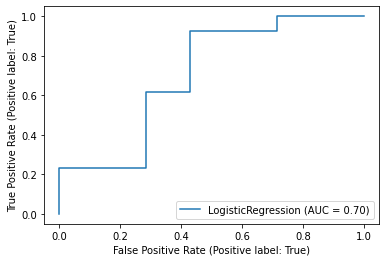

In [20]:
logistic_roc = plot_roc_curve(classifier, X_test, y_test)

In [24]:
print(confusion_matrix(y_test, y_pred))

[[4 3]
 [5 8]]


In [21]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.44      0.57      0.50         7
        True       0.73      0.62      0.67        13

    accuracy                           0.60        20
   macro avg       0.59      0.59      0.58        20
weighted avg       0.63      0.60      0.61        20



# Árvore de decisão

In [25]:
from sklearn import tree
classifier = tree.DecisionTreeClassifier()
classifier = classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.8


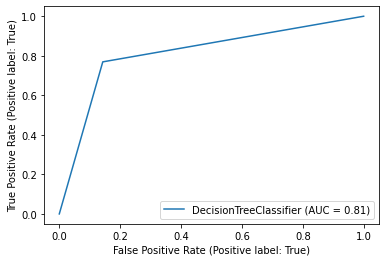

In [26]:
decision_tree_roc = plot_roc_curve(classifier, X_test, y_test)

# Random Forest

In [27]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=100)
classifier = classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.75


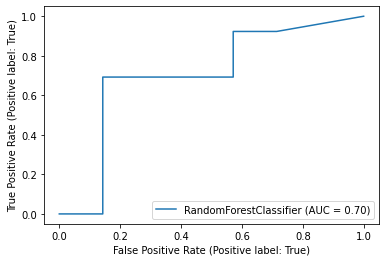

In [28]:
random_forest_roc = plot_roc_curve(classifier, X_test, y_test)

# Support Vector Machine

In [30]:
from sklearn.svm import SVC
classifier = SVC(random_state=42)
classifier = classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.65


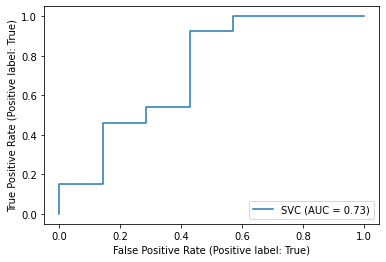

In [31]:
svm_roc = plot_roc_curve(classifier, X_test, y_test)

# Plotando ROC dos modelos

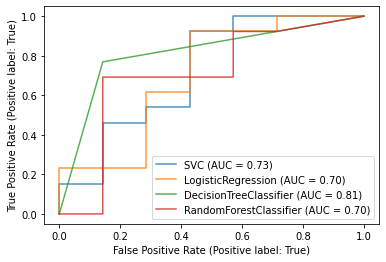

In [32]:
ax = plt.gca()
svm_roc.plot(ax=ax, alpha=0.8)
logistic_roc.plot(ax=ax, alpha=0.8)
decision_tree_roc.plot(ax=ax, alpha=0.8)
random_forest_roc.plot(ax=ax, alpha=0.8)